In [26]:
from __future__ import print_function
import pandas as pd
from sklearn import linear_model
from sklearn import ensemble
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
train_df = pd.read_csv('train.csv', header = 0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
'''
Check the general info of the data
Note that we need to:
1. Fill out missing data (e.g., "Age", "Cabin", and "Embarked") 
2. Decide which features we are going to use
3. Convert useful objects to numerical values
'''
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [17]:
# Explore class
for i in range(1,4):
    male = len(train_df[ (train_df['Sex'] == 'male') & 
                         (train_df['Pclass'] == i) ])
    female = len(train_df[ (train_df['Sex'] == 'female') & 
                           (train_df['Pclass'] == i) ])
    total = male + female
    survived_total = len(train_df[ (train_df['Pclass'] == i) &
                                   (train_df['Survived'] == 1)])
    print('Class ' + str(i) + ': ' + str(male) + ' males, ' +
          str(female) + ' females, ' + 
          str(total) + ' total, ' +
          str(survived_total) + ' (' + 
          str(100*float(survived_total)/total) + '%)' + ' survived')
    
# Higher class has a higher survival rate

Class 1: 122 males, 94 females, 216 total, 136 (62.962962963%) survived
Class 2: 108 males, 76 females, 184 total, 87 (47.2826086957%) survived
Class 3: 347 males, 144 females, 491 total, 119 (24.2362525458%) survived


In [25]:
# Explore sex
total_male = len(train_df[train_df['Sex'] == 'male'])
total_female = len(train_df[train_df['Sex'] == 'female'])
survived_male = len(train_df[ (train_df['Sex'] == 'male') & (train_df['Survived'] == 1) ])
survived_female = len(train_df[ (train_df['Sex'] == 'female') & (train_df['Survived'] == 1) ])

print (str(survived_male/float(total_male) * 100) + '% of ' + str(total_male) + ' males survived')
print (str(survived_female/float(total_female) * 100) + '% of ' + str(total_female) + ' females survived')
print (str((survived_male + survived_female)/float(total_male + total_female) * 100) +
       '% of ' + str(total_male + total_female) + ' people survived')

# Way more females survived than males

18.8908145581% of 577 males survived
74.2038216561% of 314 females survived
38.3838383838% of 891 people survived


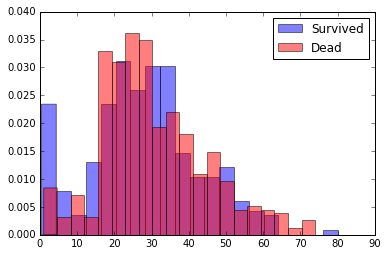

In [67]:
# Explore age
survived_age = train_df.Age[(train_df['Survived'] == 1) &
                            (~pd.isnull(train_df['Age']))]
dead_age = train_df.Age[(train_df['Survived'] == 0) &
                            (~pd.isnull(train_df['Age']))]
plt.hist(survived_age, bins = 20, normed = 1, alpha = 0.5, color = 'b', label = 'Survived')
plt.hist(dead_age, bins = 20, normed = 1, alpha = 0.5, color = 'r', label = 'Dead')
plt.legend(loc = 'upper right')

# Age does not impact survival that much except the babies

In [ ]:
def clean_df(df):
    df['Age'] = df['Age'].fillna(df.Age.median())
    df['Embarked'] = df['Embarked'].fillna('S')
    df['Gender'] = df['Sex'].map({'female':0, 'male':1}).astype(int)
    df['Family'] = df['Parch'] + df['SibSp']
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
    df = df.drop(['SibSp','Parch','Name','Sex','Ticket','Cabin','Embarked'],axis=1)
    return clean_df

In [18]:
# Let us also prepare the test data in similar format as we did for train_data
titanic_test_df = pd.read_csv('test.csv',header=0)
titanic_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [20]:
test_df = clean_up_df(titanic_test_df)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Gender         418 non-null int64
Family         418 non-null int64
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


In [24]:
# Logistic Regression 
logistic = linear_model.LogisticRegression()
X = train_data.drop(['PassengerId','Survived'],axis=1)
y = train_data['Survived']
logistic.fit(X,y)
logistic.score(X, y)

0.80134680134680136

In [26]:
X_test = test_df.drop(['PassengerId'],axis=1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass    418 non-null int64
Age       418 non-null float64
Fare      418 non-null float64
Gender    418 non-null int64
Family    418 non-null int64
dtypes: float64(2), int64(3)
memory usage: 16.4 KB


In [27]:
y_pred = logistic.predict(X_test)

In [28]:
# Random Forests 
random_forest = ensemble.RandomForestClassifier(n_estimators=100)
random_forest.fit(X,y)
y_pred = random_forest.predict(X_test)
random_forest.score(X,y)

0.97979797979797978

In [29]:
submission = pd.DataFrame({
        "PassengerId":test_df['PassengerId'],
        "Survived":y_pred
    })
submission.to_csv('titanic.csv',index=False)